In [123]:
import re
import seaborn as sns
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

names_by_year = {}
list_years = range(1900, 2001)
for year in list_years:
    names_by_year[year] = pd.read_csv(
        f'names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1900,Mary,F,16706
1900,Helen,F,6343
1900,Anna,F,6114
1900,Margaret,F,5304
1900,Ruth,F,4765
1900,Elizabeth,F,4096
1900,Florence,F,3920
1900,Ethel,F,3896
1900,Marie,F,3856
1900,Lillian,F,3414


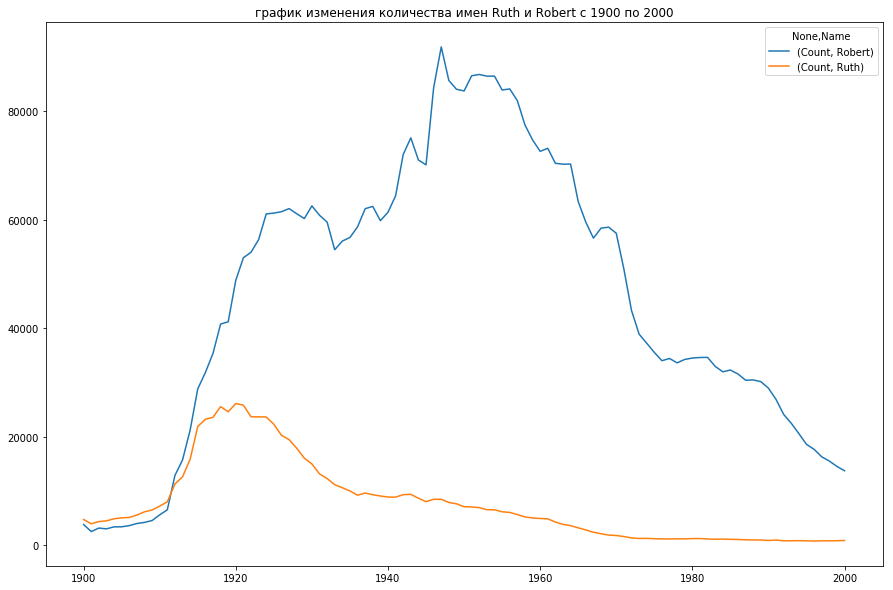

In [110]:
Ruth = names_all[names_all['Name'] =='Ruth']
Robert  = names_all[names_all['Name'] =='Robert']
Ruth_Robert = pd.concat([Ruth,Robert])
Ruth_Robert_dynamics = Ruth_Robert.groupby([Ruth_Robert.index,'Name']).sum()
Ruth_Robert_dynamics.unstack('Name').plot(title = 'график изменения количества имен Ruth и Robert с 1900 по 2000')

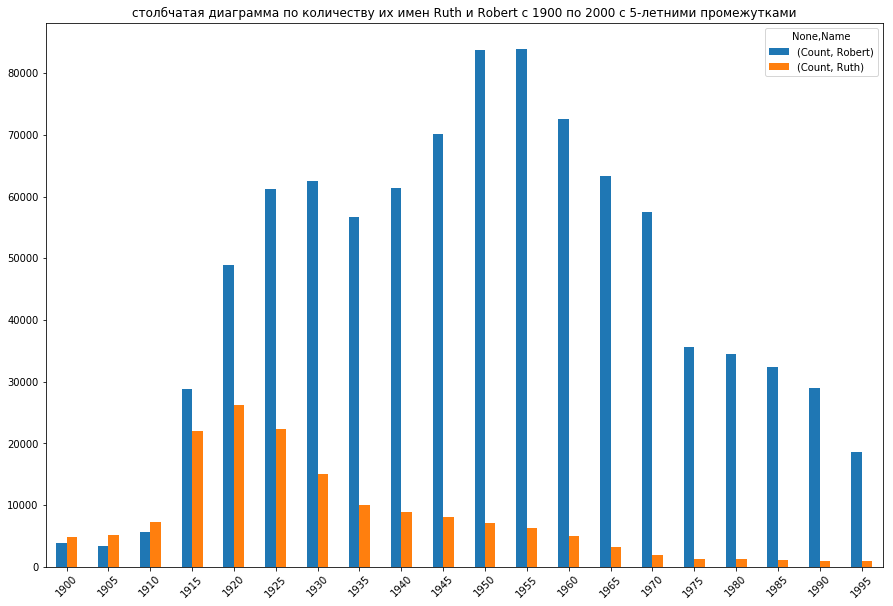

In [118]:
# Построить столбчатую диаграмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)
name_dynamics = Ruth_Robert_dynamics.loc[(Ruth_Robert_dynamics.index.get_level_values(0).isin(range(1900,2000,5)))]
name_dynamics.unstack('Name').plot(kind='bar', rot=45, 
                     title = 'столбчатая диаграмма по количеству их имен Ruth и Robert с 1900 по 2000 с 5-летними промежутками')


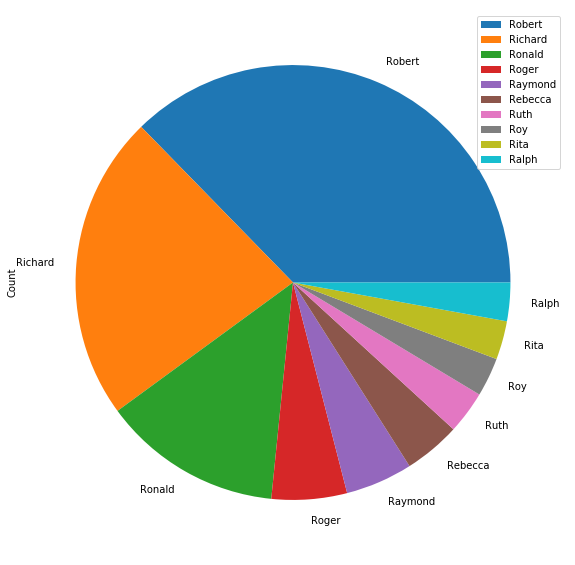

In [200]:
# Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
pattern = r'R\S+'
names_na_r = names_all.loc[names_all.iloc[:,0].str.contains(pattern)]
names_na_r_dynamics = names_na_r.groupby([names_na_r.index, 'Name']).sum()
names_na_r_dynamics = names_na_r_dynamics.loc[(names_na_r_dynamics.index.get_level_values(0).isin([1950]))]
names_na_r_dynamics = names_na_r_dynamics.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(10)
names_na_r_dynamics.plot(kind='pie', y='Count')

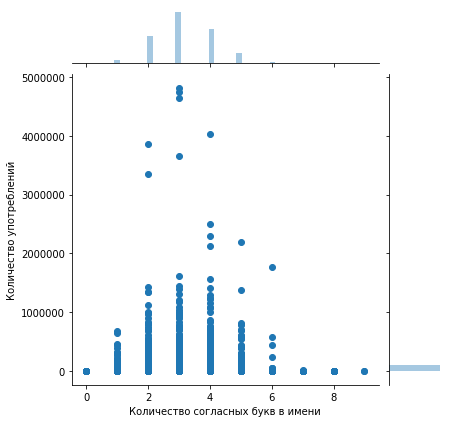

In [343]:
# Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных 
# букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".
vowels = set("aeiouy")
number_sogl = []
names_dynamics = names_all.groupby([names_all.iloc[:,0]]).sum()
word_set = list(names_dynamics.index)
for word in word_set:
    word_set = set(word.lower())
    number_sogl.append(len(word_set.difference(vowels)))
names_dynamics['sogl_in_word'] = number_sogl
sns.jointplot(x='sogl_in_word', y='Count', 
              data=names_dynamics, kind='scatter').set_axis_labels(
    "Количество согласных букв в имени",
    "Количество употреблений")

